# PROJET A - MORPION

*GAND Valentin - PICOT Benoît - TARCY Allan*

## Chargement des librairies et des images

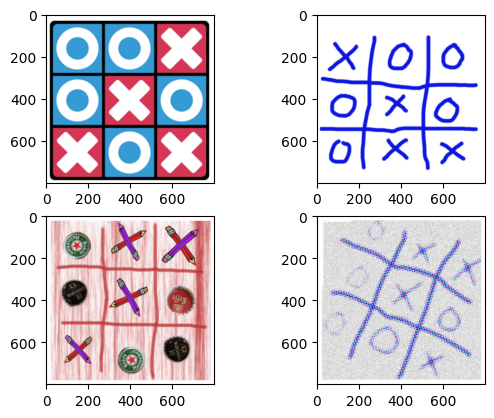

In [99]:
import cv2
import matplotlib.pyplot as plt
import utils as u
import symbol_detection as sd

import importlib
importlib.reload(sd)
importlib.reload(u)

ima = u.read_and_resize(800, "img/ima.png")
imb = u.read_and_resize(800, "img/imb.png")
imc = u.read_and_resize(800, "img/imc.png")
imd = u.read_and_resize(800, "img/imd.png")

plt.figure()
plt.subplot(2, 2, 1)
u.show(ima)
plt.subplot(2, 2, 2)
u.show(imb)
plt.subplot(2, 2, 3)
u.show(imc)
plt.subplot(2, 2, 4)
u.show(imd)


## Érosion

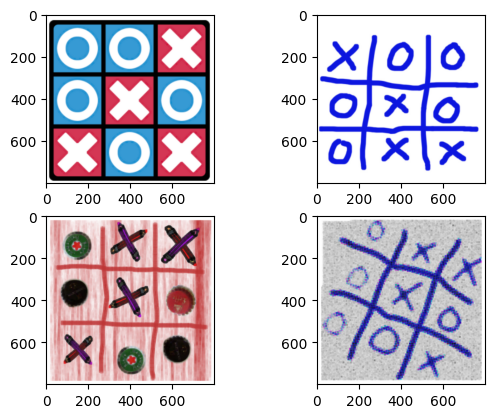

In [100]:
kernel = 3
element = cv2.getStructuringElement(
    cv2.MORPH_RECT, (2*kernel + 1, 2*kernel + 1), (kernel, kernel))

erode_a = cv2.erode(ima, element)
erode_b = cv2.erode(imb, element)
erode_c = cv2.erode(imc, element)
erode_d = cv2.erode(imd, element)

plt.figure()
plt.subplot(2, 2, 1)
u.show(erode_a)
plt.subplot(2, 2, 2)
u.show(erode_b)
plt.subplot(2, 2, 3)
u.show(erode_c)
plt.subplot(2, 2, 4)
u.show(erode_d)


## Filtre médian

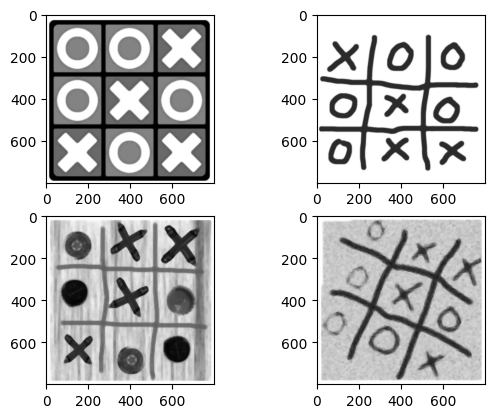

In [101]:

gray_a = cv2.cvtColor(erode_a, cv2.COLOR_BGR2GRAY)
gray_b = cv2.cvtColor(erode_b, cv2.COLOR_BGR2GRAY)
gray_c = cv2.cvtColor(erode_c, cv2.COLOR_BGR2GRAY)
gray_d = cv2.cvtColor(erode_d, cv2.COLOR_BGR2GRAY)

median_a = cv2.medianBlur(gray_a, 11)
median_b = cv2.medianBlur(gray_b, 11)
median_c = cv2.medianBlur(gray_c, 11)
median_d = cv2.medianBlur(gray_d, 11)

plt.figure()
plt.subplot(2, 2, 1)
u.show(median_a)
plt.subplot(2, 2, 2)
u.show(median_b)
plt.subplot(2, 2, 3)
u.show(median_c)
plt.subplot(2, 2, 4)
u.show(median_d)


## Canny

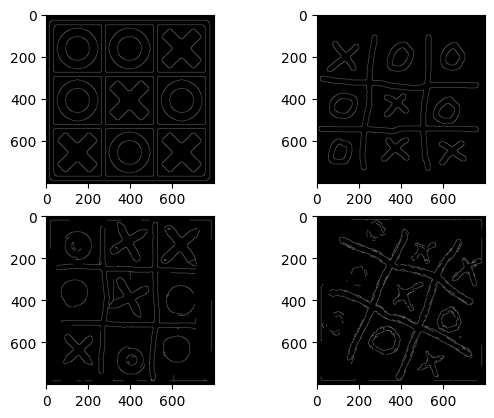

In [102]:

canny_a = cv2.Canny(median_a, 100, 200)
canny_b = cv2.Canny(median_b, 100, 200)
canny_c = cv2.Canny(median_c, 100, 200)
canny_d = cv2.Canny(median_d, 100, 200)

plt.figure()
plt.subplot(2, 2, 1)
u.show(canny_a)
plt.subplot(2, 2, 2)
u.show(canny_b)
plt.subplot(2, 2, 3)
u.show(canny_c)
plt.subplot(2, 2, 4)
u.show(canny_d)


## Dilatation

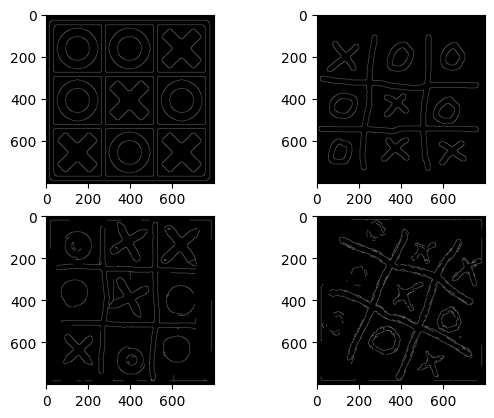

In [103]:
kernel = 0
element = cv2.getStructuringElement(
    cv2.MORPH_RECT, (2*kernel + 1, 2*kernel + 1), (kernel, kernel))

dilate_a = cv2.dilate(canny_a, element)
dilate_b = cv2.dilate(canny_b, element)
dilate_c = cv2.dilate(canny_c, element)
dilate_d = cv2.dilate(canny_d, element)

plt.figure()
plt.subplot(2, 2, 1)
u.show(dilate_a)
plt.subplot(2, 2, 2)
u.show(dilate_b)
plt.subplot(2, 2, 3)
u.show(dilate_c)
plt.subplot(2, 2, 4)
u.show(dilate_d)


## Reconnaissance de la grille et des intersections
### Transformée de Hough

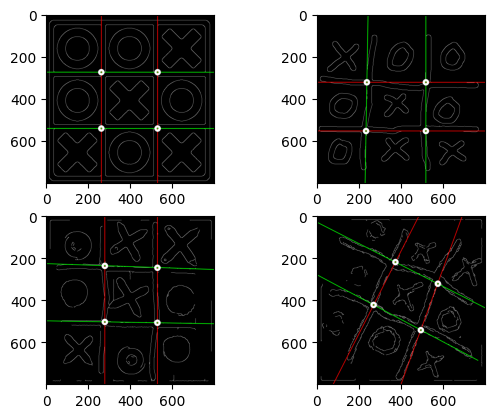

In [104]:
lines_a, corners_a = u.locate_grid(dilate_a, gray_a)
lines_b, corners_b = u.locate_grid(dilate_b, gray_b)
lines_c, corners_c = u.locate_grid(dilate_c, gray_c)
lines_d, corners_d = u.locate_grid(dilate_d, gray_d)

plt.figure()
plt.subplot(2, 2, 1)
u.show(lines_a)
plt.subplot(2, 2, 2)
u.show(lines_b)
plt.subplot(2, 2, 3)
u.show(lines_c)
plt.subplot(2, 2, 4)
u.show(lines_d)


## Rotation de la grille

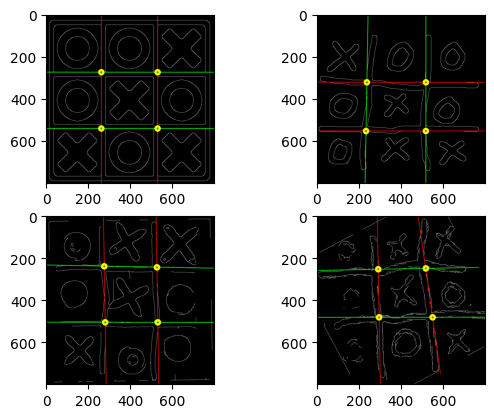

In [105]:
rotate_a, corners_t_a, ima_rotate = u.rotate(lines_a, corners_a, ima)
rotate_b, corners_t_b, imb_rotate = u.rotate(lines_b, corners_b, imb)
rotate_c, corners_t_c, imc_rotate = u.rotate(lines_c, corners_c, imc)
rotate_d, corners_t_d, imd_rotate = u.rotate(lines_d, corners_d, imd)

plt.figure()
plt.subplot(2, 2, 1)
u.show(rotate_a)
plt.subplot(2, 2, 2)
u.show(rotate_b)
plt.subplot(2, 2, 3)
u.show(rotate_c)
plt.subplot(2, 2, 4)
u.show(rotate_d)


## Découpage des images en neuf zones

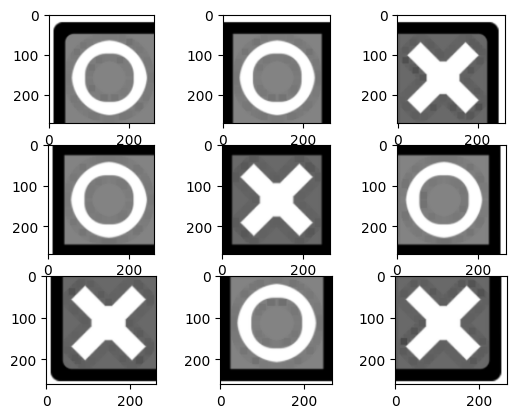

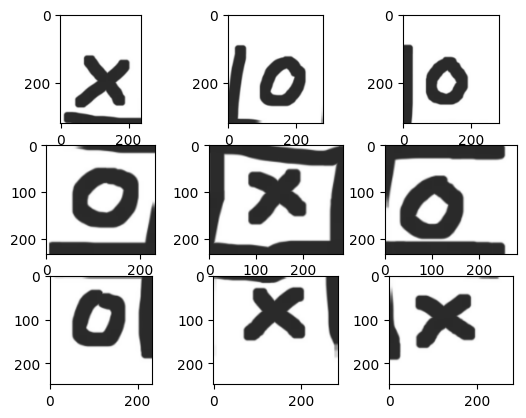

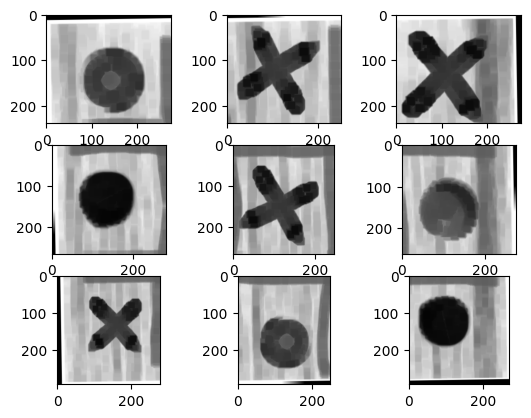

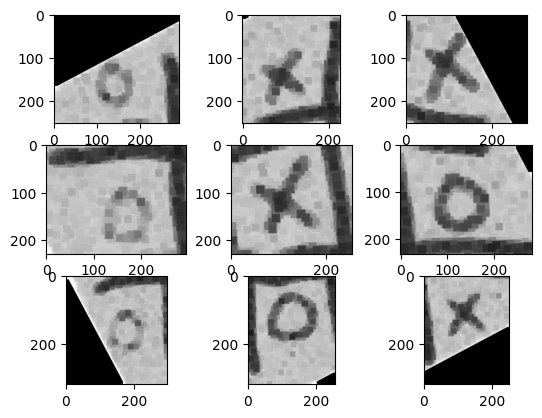

In [106]:

zones_a = u.zoning(corners_t_a, ima_rotate)
zones_b = u.zoning(corners_t_b, imb_rotate)
zones_c = u.zoning(corners_t_c, imc_rotate)
zones_d = u.zoning(corners_t_d, imd_rotate)

paths_a = u.export(zones_a,"ima")
paths_b = u.export(zones_b,"imb")
paths_c = u.export(zones_c,"imc")
paths_d = u.export(zones_d,"imd")

## Détection du contenu des zones

In [107]:
results_a = u.symbols(paths_a)
results_b = u.symbols(paths_b)
results_c = u.symbols(paths_c)
results_d = u.symbols(paths_d)

print(results_a)
print(results_b)
print(results_c)
print(results_d)

['CASE 0: ROND\n', 'CASE 1: ROND\n', 'CASE 2: CROIX\n', 'CASE 3: ROND\n', 'CASE 4: CROIX\n', 'CASE 5: ROND\n', 'CASE 6: CROIX\n', 'CASE 7: ROND\n', 'CASE 8: CROIX\n']
['CASE 0: CROIX\n', 'CASE 1: ROND\n', 'CASE 2: ROND\n', 'CASE 3: ROND\n', 'CASE 4: CROIX\n', 'CASE 5: ROND\n', 'CASE 6: ROND\n', 'CASE 7: CROIX\n', 'CASE 8: CROIX\n']
['CASE 0: ROND\n', 'CASE 1: CROIX\n', 'CASE 2: CROIX\n', 'CASE 3: ROND\n', 'CASE 4: CROIX\n', 'CASE 5: ROND\n', 'CASE 6: CROIX\n', 'CASE 7: ROND\n', 'CASE 8: ROND\n']
['CASE 0: ROND\n', 'CASE 1: CROIX\n', 'CASE 2: CROIX\n', 'CASE 3: ROND\n', 'CASE 4: CROIX\n', 'CASE 5: ROND\n', 'CASE 6: ROND\n', 'CASE 7: ROND\n', 'CASE 8: CROIX\n']


## Résumé de projet

Dans un premier temps, nous avons souhaité réaliser une application de résolution de labyrinthe. Ne sachant pas réellement comment aborder le sujet, nous avons décidé de nous réorienter vers le projet A dont l'objet était de traiter des images représentant des parties de morpion.

Au cours de ce projet, nous avons pu utiliser une grande partie des notions vues en cours, et aller au-delà en utilisant Python et la librairie OpenCV et en implémentant une solution de machine learning pour résoudre le problème posé lors de la seconde partie du projet.

### ÉTAPE 1: RECONNAISSANCE DES LIGNES DE LA GRILLE

Pour mettre en place notre solution de reconnaissance des lignes de la grille, nous avons exploré plusieurs pistes avant de nous fixer sur une solution effective.

Nous avons illustré nos étapes de réflexion au travers du diagramme ci-dessous. 

#### Résumé des étapes suivies pour la construction de l'application de reconnaissance d'images de morpion

```mermaid
graph TD

classDef success fill:green,color:black,stroke:black
classDef failure fill:red,color:black,stroke:black

A([ÉTAPE 1])-.->B(1 - HoughLines)
A-.->C(2 - HoughLinesP)
A-.->D(3 - Homographie)
A-->E(4 - HoughLines)
E-->F(5 - Prétraitements de l'image)
F-.->G(6 - goodFeaturesToTrack)
F-->H(7 - Segmentation des lignes)
H-->I(8 - Rotation de la grille)
I-->J(9 - Séparation en neuf zones)
J-->K([ÉTAPE 2])
K-.->L(1 - HoughCircles)
K-.->M(2 - findContours)
K-.->N(3 - HoughCircles)
K-->O(4 - Machine learning)
O-->P([ÉTAPE 3])
P-->Q(1 - Classe Tictactoe)

class A,E,F,H,I,J,K,O,P,Q success
class B,C,D,G,L,M,N failure
```

1. Utilisation de la fonction `HoughLines`

Naturellement, nous avons entamé nos travaux par des tests sur la transformée de Hough. Dans un premier temps, nous avons cherché à comprendre les paramètres de la fonction et la théorie se cachant derrière la transformée de Hough. Quelques ajustements des paramètres nous ont permis de récupérer les quatres lignes de la grille.

![hough_lines](../docs/img/houghlines.png)

2. Utilisation de la fonction `HoughLinesP`

Pour obtenir la position des points, nous avons essayé d'utiliser la fonction HoughLinesP, implémentation de la transformée de Hough probabiliste permettant de définir des bornes min et max sur la taille des segments recherchés dans l'image. La diversité des exemples sur lesquels nous travaillions ne nous a pas permis d'obtenir des résultats satisfaisants en utilisant cette méthode.

![hough_lines_p](../docs/img/hough_lines_p.png)

3. Recherches sur l'homographie

Pour combler le manque de précision de la fonction HoughLinesP nous avons pensé nous appuyer sur l'homographie, une technique permettant d'appliquer une projection d'une image sur un plan. Cette technique nous paraissait être interessante, cependant, compte tenu du temps à notre disposition pour ce projet nous n'avons pas étendu nos recherches sur le sujet.

![homography](../docs/img/homographie.png)

4. Retour sur la fonction `HoughLines`

Après cette vague digression, nous sommes revenus sur la fonction HoughLines en creusant plus en détail la théorie derrière cet algorithme (accumulateurs, résolution, ...).

5. Affinage du prétraitement des images

Pour améliorer la reconnaissance des lignes par la transformée de Hough, nous avons effectué des prétraitements sur les images de morpion. C'est ici que nous avons utilisé le filtre médian et l'érosion pour prévenir le bruit dans les images.

![traitements](../docs/img/traitements.png)

6. Récupération des intersections des lignes

Pour récupérer les intersections de lignes, nous avons dans un premier temps utilisé la fonction `goodFeaturesToTrack` qui permet de retrouver l'ensemble des corners de l'image. En multipliant les exemples en entrée, nous avons remarqué les limites de cette fonction qui considère également les fins de lignes présentes dans l'image. Cela complexifie la détection des intersections des lignes. Nous avons donc continué nos travaux dans la perspective d'une solution plus certaine.

![erreur_gFTT](../docs/img/erreur_goodFeaturesToTrack.png)

7. Reconnaissance des deux groupes de lignes parallèles (k-moyennes)

En poursuivant nos recherches, nous avons découvert l'existance de l'algorithme des k-moyennes permettant de segmenter des données en fonction de leurs caractéristiques communes. Ici, nous nous sommes appuyé sur un exemple d'implémentation permettant de retrouver les lignes parallèles dans notre image et de fait les coordonnées de leurs intersections. Ce sont les fonctions `segmented_by_angle_kmeans`, `segmented_intersections` et `intersection` qui assurent les fonctionnalités.

Cette approche nous permettait de situer les pivots de la grille en la repérant dans l'image.

![k-means](../docs/img/k-means.png)

Source : [K-means](https://stackoverflow.com/questions/46565975/find-intersection-point-of-two-lines-drawn-using-houghlines-opencv)

8. Rotation de la grille

Avant de traiter et séparer en neuf zones toutes les images, nous devions connaître l'orientation de la grille afin de redresser les image présentant une grille non alignée. Pour ce faire, nous avons dû trier les quatre pivots de la grille et corriger l'angle entre les deux pivots du bas, en appliquant une rotation sur l'image. 

![rotation](../docs/img/rotation.png)

9.  Séparation en neuf zones

Une fois l'image correctement positionnée, nous pouvions la découper en neuf cases pour débuter l'extraction des symboles.

![zoning](../docs/img/zoning.png)

### ÉTAPE 2: RECONNAISSANCE DES SYMBOLES

1. Utilisation de la fonction `HoughCircles`

Comme suggéré dans le sujet, nous avons entamé les recherches de cercles dans les cases en utilisant la transformée de Hough et la fonction `HoughCircles` dont le fonctionnement est analogue à la fonction `HoughLines`.

![circles](../docs/img/houghcircles.png)

2. Utilisation de la fonction `findContours`

En parallèle, nous avons tenté d'implémenter une solution permettant de distinguer clairement un cercle d'une croix, en repérant les contours des formes présentes dans l'image. Cette approche s'est soldée par un échec car elle dépendait trop de la qualité de l'image en entrée.

![findContours](../docs/img/findContours.png)

Source : [exemple d'utilisation de la fonction](https://www.geeksforgeeks.org/how-to-detect-shapes-in-images-in-python-using-opencv/)

3. Retour sur la fonction `HoughCircles`

Nous nous sommes donc reconcentrés sur la recherche de cercle dans l'image avec la fonction `HoughCircles`. Cependant, notre technique d'extraction des images des cases et la diversité des images en entrée ont limité la précision des paramètres que nous pouvions appporter à la fonction `HoughCircles` qui n'apparaissait d'ailleurs pas comme étant une solution robuste pour la détection de cercles manuscrits ou d'ellipse. Finalement, nous n'avons pas su apporter de réponse à la détection de faux cercles et nous avons étendu nos recherches à d'autres solutions.

![faux_cercles](../docs/img/faux_cercle.png)

4. Implémentation d'une solution de machine learning

Pour surmonter notre blocage, nous avons opté pour une solution de reconnaissance par apprentissage supervisé. L'avantage de cette solution résidait dans l'abstraction du réseau par rapport au bruit contenu dans l'image en entrée. Faute de trouver une base de données pertinente sur internet, nous avons utilisé l'outil teachable machine de Google pour entrainer un réseau à reconnaitre des cercles, croix et cases vides à partir d'images en noir et blanc. Pour améliorer la qualité de notre réseau de neurones, nous lui avons soumis des données suplémentaires de morpions dessinés à la main.

Le résultat est satisfaisant, car l'algorithme est capable de détecter le contenu des cases avec une précision intéressante.

![page web](../docs/img/teachable_machine.png)

Source: [Teachable machine](https://teachablemachine.withgoogle.com/train)


### ÉTAPE 3: RECONNAISSANCE DE L'ÉTAT DE LA PARTIE

1. Implémentation d'une classe pour gérer la partie

Pour déterminer l'état de la partie, nous avons implémenté une classe `tictactoe` permettant de détecter l'état de la partie en fonction du résultat des neuf cases de l'image.

### Conclusion

1. Bilan

Nous sommes plutôt satisfaits de notre travail. Notre application fonctionne sur tous les exemples fournis dans le sujet et sur certains exemples supplémentaires que nous avons recueilli.

Ce projet nous a permis de remarquer l'intérêt de l'intelligence artificielle en traitement d'images pour généraliser au maximum les traitements des images en entrée.

Le plus interessant est d'avoir trouvé une solution hybride reposant sur un certain nombre d'éléments de traitements d'images. C'était une façon empirique de démontrer ce que nous avons pu apprendre en cours: il existe une multitude de solution pour résoudre un problème.

2. Retour d'expérience

Nous avons pris du retard en changeant de sujet en cours de projet. Cependant, ce choix nous a permis de revenir sur un problème en lien avec certains éléments vus durant les TPs.

Nous avons apprécié la liberté que nous avons eu lors du déroulement du projet, autant sur le choix du langage utilisé que sur la façon d'implémenter les solutions au problème de traitement d'image choisi.

Cette liberté s'est accompagnée de difficultés d'appropriation des spécificités du langage choisi et des techniques à implémenter.

Malgré les difficultés rencontrées, ce projet a été interessant car il nous a permis d'aller explorer des cas pratiques de traitement d'images.